# Unsupervised Learning – Understanding K-Means Clustering Notebook

In this lab you will explore unsupervised learning by building up the K-Means clustering algorithm from first principles. By the end of this lab you will review:
- Clustering algorithms
- Euclidean distance
- The Kmeans clustering algorithm
- Recommendation Systems

## Introduction to Unsupervised Learning

Unsupervised learning methods discover inherent patterns in data without using labeled outcomes. In this section, we illustrate these ideas with a simple visualization.

In [363]:
import numpy as np
import matplotlib.pyplot as plt

In [364]:
# define a toy dataset of 2D points
points = np.array([
    [20, 20], 
    [30, 30], 
    [40, 20], 
    [50, 20], 
    [50, 50], 
    [30, 50], 
    [40, 10], 
    [50, 10], 
    [60, 30], 
    [60, 50]
])

C:\Users\saidmf\AppData\Local\Temp\ipykernel_13580\3738666329.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


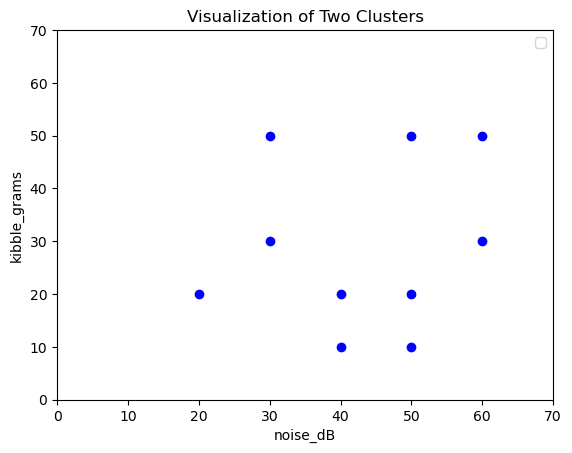

In [365]:
# Create a scatter plot to visualize these clusters
plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.title('Visualization of Two Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

Let's say we have the following unlabeled dataset. Could we sufficiently assign labels that cluster these data points together? 

Let's assume two clusters in our dataset and apply the kmeans clustering algorithm.

In [366]:
# set the number of clusters
k = 2

# randomly assign a cluster for each data point
np.random.seed(42) 
clusters = np.random.randint(0, k, size=points.shape[0])

# print out initial cluster assignments
print('Initial cluster assignments:', clusters)

Initial cluster assignments: [0 1 0 0 0 1 0 0 0 1]


C:\Users\saidmf\AppData\Local\Temp\ipykernel_13580\2840152359.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


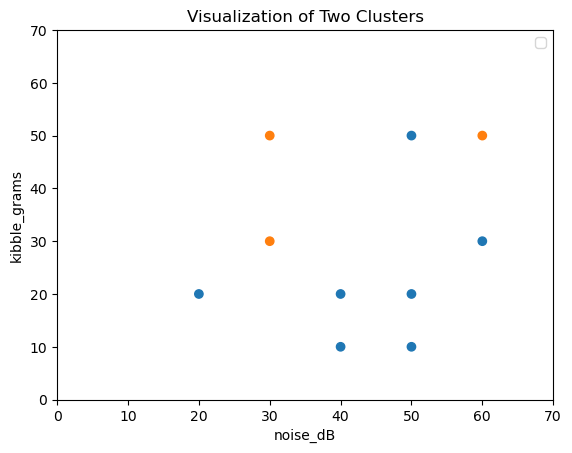

In [367]:
# Create a scatter plot to visualize these clusters
colors = {0:'tab:blue', 1:'tab:orange'}

plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.title('Visualization of Two Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

We've created two manually defined clusters and visualized them using a scatter plot. How well did we capture groupings however?

To answer this question, we must calculate centroids and utilize our squared euclidean distance formula.

## Conceptual Walkthrough of K-Means Clustering

In this section we build foundational components for the K-Means algorithm starting with distance computation and centroid calculation.

In [368]:
def squared_euclidean_distance(a, b):
    """Compute and return the squared Euclidean distance between two points a and b."""
    return np.sum((a - b) ** 2)

The function defined above computes the squared Euclidean distance between two points. It subtracts one point from the other, squares the differences, and sums them. This metric is useful for determining how similar or different two points are in Euclidean space.

In conjunction with the squared_euclidean_distance function, let's calculate the centroids of our respective classes.

In [369]:
# get clusters
cluster0 = points[clusters == 0]
cluster1 = points[clusters == 1]

print("cluster 0\n", cluster0)
print("cluster 1\n", cluster1)

cluster 0
 [[20 20]
 [40 20]
 [50 20]
 [50 50]
 [40 10]
 [50 10]
 [60 30]]
cluster 1
 [[30 30]
 [30 50]
 [60 50]]


We can calculate the centroids of our clusters by simply getting the average data point across all points within one cluster.

In [370]:
centroid0 = cluster0.mean(axis=0)
centroid1 = cluster1.mean(axis=0)

print("centroid 0\n", centroid0)
print("centroid 1\n", centroid1)

centroid 0
 [44.28571429 22.85714286]
centroid 1
 [40.         43.33333333]


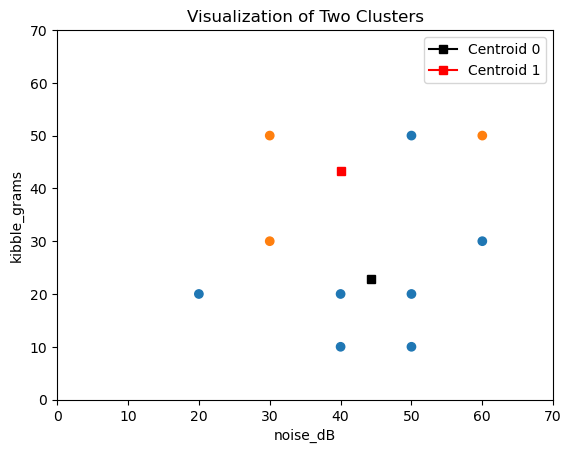

In [371]:
plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.plot(centroid0[0],centroid0[1],marker='s', c='black', label='Centroid 0') 
plt.plot(centroid1[0],centroid1[1],marker='s', c='red', label='Centroid 1') 
plt.title('Visualization of Two Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

Lastly, let's define logic which will iterate over each data point, measure the euclidean distance from centroids, and update data point clusters by choosing the class with the nearest centroid.

In [372]:
def assign_clusters(data, centroids):
    """Assign each data point to the closest centroid using squared Euclidean distance."""
    clusters = []
    for point in data:
        distances = [squared_euclidean_distance(point, c) for c in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

The function `assign_clusters` iterates through each data point, computes its squared Euclidean distance to each centroid, and assigns the point to the cluster with the minimum distance.

Additionally, we need logic which will iteratively calculate new centroids based on our new cluster assignment.

In [373]:
def update_centroids(data, clusters, K):
    """Calculate new centroids as the mean of data points in each cluster."""
    new_centroids = []
    for k in range(K):
        points = data[clusters == k]
        new_centroids.append(points.mean(axis=0) if len(points) > 0 else np.array([0, 0]))
    return np.array(new_centroids)

The `update_centroids` function computes the new centroid for each cluster by taking the mean of all data points assigned to that cluster. It also handles the case where a cluster might have no points.

Let's execute one iteration of our kmean algorithm and observe which new assignments emerge.

In [374]:
# one iteration: assign clusters and update centroids
centroids = [centroid0, centroid1]

clusters = assign_clusters(points, centroids)
new_centroids = update_centroids(points, clusters, K=2)

print('Cluster assignments:', clusters)
print('Updated centroids:\n', new_centroids)

Cluster assignments: [0 0 0 0 1 1 0 0 0 1]
Updated centroids:
 [[41.42857143 20.        ]
 [46.66666667 50.        ]]


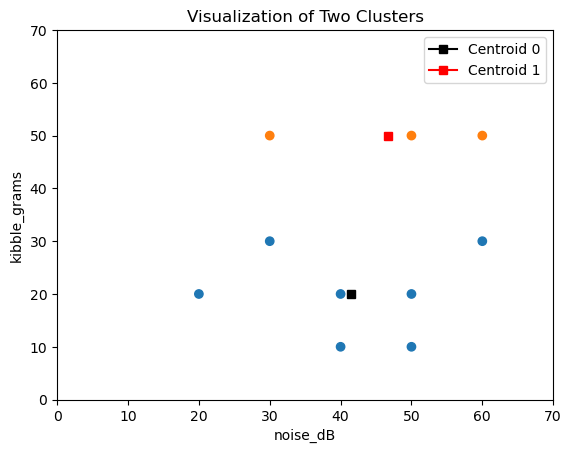

In [375]:
# plot updated centroids and clusters
plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.plot(new_centroids[0][0],new_centroids[0][1],marker='s', c='black', label='Centroid 0') 
plt.plot(new_centroids[1][0],new_centroids[1][1],marker='s', c='red', label='Centroid 1') 
plt.title('Visualization of Two Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

Let's try for another iteration and see what happens.

In [376]:
# second iteration: assign clusters and update centroids
centroids = [centroid0, centroid1]

clusters = assign_clusters(points, centroids)
new_centroids = update_centroids(points, clusters, K=2)

print('Cluster assignments:', clusters)
print('Updated centroids:\n', new_centroids)

Cluster assignments: [0 0 0 0 1 1 0 0 0 1]
Updated centroids:
 [[41.42857143 20.        ]
 [46.66666667 50.        ]]


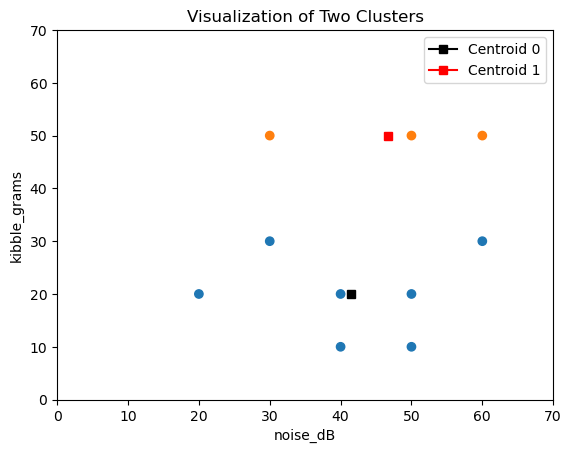

In [377]:
# plot updated centroids and clusters
plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.plot(new_centroids[0][0],new_centroids[0][1],marker='s', c='black', label='Centroid 0') 
plt.plot(new_centroids[1][0],new_centroids[1][1],marker='s', c='red', label='Centroid 1') 
plt.title('Visualization of Two Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

It seems like we reached stopped cluster assignment! We can state that these are our "best" cluster assignments if we assume only 2 clusters. However...
* How do we know if k=2 is the best cluster number?
* What if we changed our random initial assignment? Would that result in different clusters?

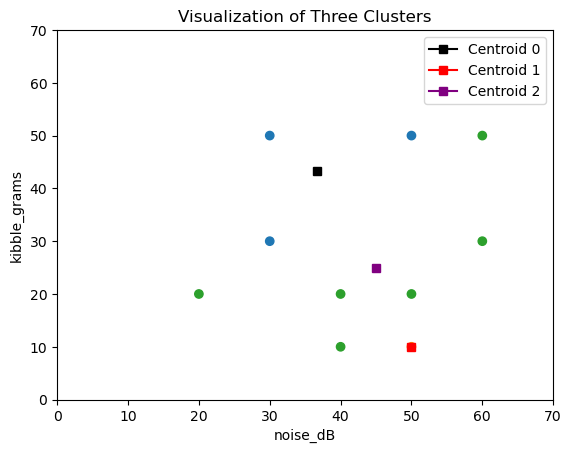

In [378]:
# set the number of clusters
k = 3

# randomly assign a cluster for each data point
np.random.seed(42) 
clusters = np.random.randint(0, k, size=points.shape[0])

# get clusters
cluster0 = points[clusters == 0]
cluster1 = points[clusters == 1]
cluster2 = points[clusters == 2]

# get centroids
centroid0 = cluster0.mean(axis=0)
centroid1 = cluster1.mean(axis=0)
centroid2 = cluster2.mean(axis=0)

centroids = [centroid0, centroid1, centroid2]

# Create a scatter plot to visualize these clusters
colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}

plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.plot(centroids[0][0],centroids[0][1],marker='s', c='black', label='Centroid 0') 
plt.plot(centroids[1][0],centroids[1][1],marker='s', c='red', label='Centroid 1') 
plt.plot(centroids[2][0],centroids[2][1],marker='s', c='purple', label='Centroid 2') 
plt.title('Visualization of Three Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

In [379]:
# iteration 1
clusters = assign_clusters(points, centroids)
new_centroids = update_centroids(points, clusters, K=3)

print('Cluster assignments:', clusters)
print('Updated centroids:\n', new_centroids)

Cluster assignments: [2 0 2 2 0 0 1 1 2 0]
Updated centroids:
 [[42.5 45. ]
 [45.  10. ]
 [42.5 22.5]]


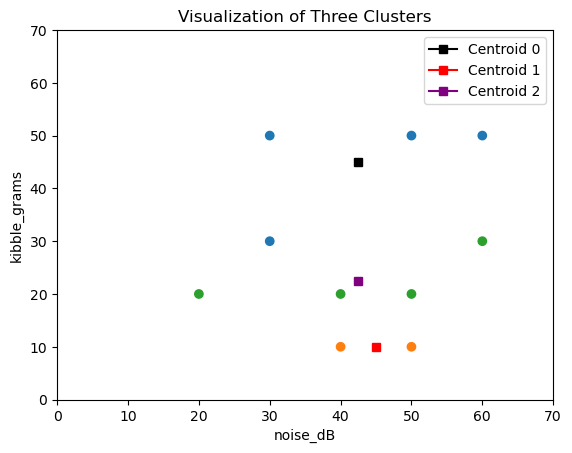

In [380]:
plt.scatter(points[:, 0], points[:, 1],  c=np.vectorize(colors.get)(clusters))
plt.plot(new_centroids[0][0],new_centroids[0][1],marker='s', c='black', label='Centroid 0') 
plt.plot(new_centroids[1][0],new_centroids[1][1],marker='s', c='red', label='Centroid 1') 
plt.plot(new_centroids[2][0],new_centroids[2][1],marker='s', c='purple', label='Centroid 2') 
plt.title('Visualization of Three Clusters')

plt.xlim([0, 70])
plt.ylim([0, 70])
plt.xlabel('noise_dB')
plt.ylabel('kibble_grams')
plt.legend()
plt.show()

This code executes a single iteration of K-Means, where data points are first assigned to the nearest centroid and then new centroids are calculated based on these assignments.

Challenge: Integrate these steps inside a loop to run multiple iterations until convergence, or try varying the number of clusters.

## Determining the Optimal Number of Clusters

In this section we explore how to evaluate clustering performance. The elbow method assists in selecting the optimal number of clusters by analyzing the inertia (sum of squared distances).

### Elbow Plot

In [381]:
from sklearn.cluster import KMeans

inertias = []
ks = range(1, 10)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(points)
    inertias.append(kmeans.inertia_)
    print('K:', k, 'Inertia:', kmeans.inertia_)

K: 1 Inertia: 3900.0
K: 2 Inertia: 1952.3809523809525
K: 3 Inertia: 1126.6666666666667
K: 4 Inertia: 710.0
K: 5 Inertia: 610.0
K: 6 Inertia: 560.0
K: 7 Inertia: 400.0
K: 8 Inertia: 100.0
K: 9 Inertia: 50.0


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

This block uses Scikit-Learn's KMeans to compute and print the inertia for cluster counts ranging from 1 to 4. Observing the inertia values helps in determining the 'elbow' point beyond which additional clusters do not significantly reduce the error.

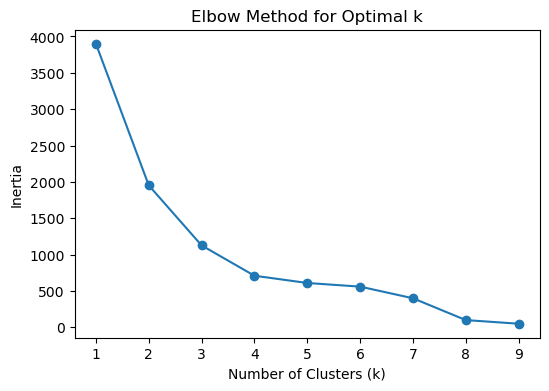

In [382]:
plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

The plot generated above shows the relationship between the number of clusters and the corresponding inertia. An 'elbow' in this plot suggests a good choice for k.

Here we could state an "elbow" exists at k=3 or k=4.

### Silhouette Analysis

We can also view the silhouette score of our clusters to determine how 'tightly grouped' together clusters are. A greater value indicates better clusters, while values close to -1 indicates poorly created clusters.

In [383]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(points)

    labels = kmeans.labels_
    score = silhouette_score(points, labels)
    silhouette_scores.append(score)

    print('K:', k, 'Silhouette:', score)

K: 2 Silhouette: 0.40052524577686033
K: 3 Silhouette: 0.3619417089389997
K: 4 Silhouette: 0.3486703806474462
K: 5 Silhouette: 0.24027840642085824
K: 6 Silhouette: 0.11819409138076424
K: 7 Silhouette: -0.049555164578574756
K: 8 Silhouette: 0.1
K: 9 Silhouette: 0.0


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

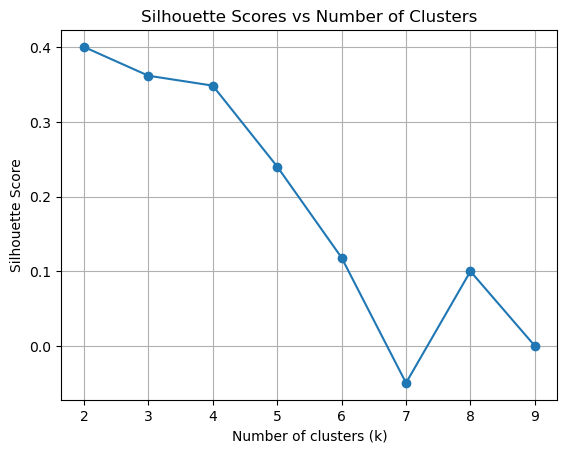

In [384]:
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Most measures of cluster tightness point to around the same number of clusters. Note that our silhouette score points to an optimal amount of clusters at `k=2` or `k=3`.

### Gap Statistic

Again, there are around 30 metrics to choose from when evaluating best clusters. We'll stop at 3.

The last metric is the gap statistic. Think of this as a hypothesis test where we measure the difference between the actual WSS & the expected WSS under the null distribution of our data. Our goal here is to find the smallest `k` such that we have the largest gap statistic.

Unfortunately there is no default gap statistic method in sklearn, we have to pull code from Kaggle: https://www.kaggle.com/code/mallikarjunaj/gap-statistics

In [385]:
def gap_stat(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps)
    """
    nrefs=3
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = []
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
            
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf.append({'clusterCount':k, 'gap':gap})

    return resultsdf

In [386]:
gap_stats = gap_stat(points, maxClusters=10)
gap_stats

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

[{'clusterCount': 1, 'gap': np.float64(-7.7279210909809475)},
 {'clusterCount': 2, 'gap': np.float64(-7.7832823123920605)},
 {'clusterCount': 3, 'gap': np.float64(-7.822160850574183)},
 {'clusterCount': 4, 'gap': np.float64(-8.067337719499397)},
 {'clusterCount': 5, 'gap': np.float64(-8.343478635623581)},
 {'clusterCount': 6, 'gap': np.float64(-7.567052832486029)},
 {'clusterCount': 7, 'gap': np.float64(-8.082573893531034)},
 {'clusterCount': 8, 'gap': np.float64(-8.702472647456005)},
 {'clusterCount': 9, 'gap': np.float64(-10.208117693382622)}]

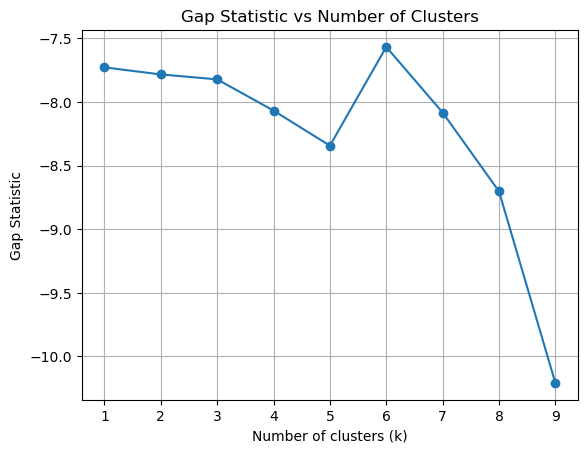

In [387]:
ks = [g["clusterCount"] for g in gap_stats]
gap_measures = [g["gap"] for g in gap_stats]

plt.plot(ks, gap_measures, marker='o')
plt.title('Gap Statistic vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.grid(True)
plt.show()

Our gap statistic points to an optimal amount of clusters at `k=2`.

## Application to a Realistic Dataset: Music Features

Here we apply the K-Means algorithm to a realistic dataset containing music track features. This exercise simulates a real-world scenario where clustering can aid in tasks like recommendation system development.

In [388]:
import pandas as pd

# Load the music features dataset (ensure 'sample_music.csv' is in the working directory)
songs = pd.read_csv('sample_music.csv')

songs.sample(n=5)

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
720,scorpions,top of the bill,1978,rock,roll chart blood cold get life roll crazy roll...,23,0.002924,0.409948,0.002924,0.002924,...,0.002924,0.002924,0.059957,0.002924,0.082937,0.002924,0.002924,0.002924,violence,0.600000
994,oscar peterson,i've got you under my skin,1953,jazz,skin deep heart deep heart skin try say affair...,61,0.093452,0.326061,0.001144,0.095130,...,0.270059,0.001144,0.001144,0.001144,0.001144,0.001144,0.152028,0.001144,violence,0.957143
598,talking heads,love for sale,1986,rock,bear house television guess grow fast forget c...,44,0.002193,0.002193,0.002193,0.118536,...,0.002193,0.475251,0.002193,0.319326,0.002193,0.053992,0.002193,0.002193,obscene,0.485714
982,bing crosby,sweet leilani,1956,jazz,sweet leilani heavenly nature fashion roses ki...,48,0.098251,0.002193,0.002193,0.002193,...,0.054822,0.002193,0.061513,0.002193,0.289516,0.002193,0.002193,0.002193,romantic,0.914286
932,the marvelettes,happy days,1961,pop,days days days days go away stay gonna friends...,45,0.001144,0.001144,0.656116,0.001144,...,0.001144,0.001144,0.001144,0.001144,0.001144,0.001144,0.185833,0.001144,world/life,0.842857


The code above reads the music features dataset from a CSV file and prints the first five rows so you can inspect its structure.

Let's explore this dataset through some light EDA.

In [389]:
# TODO: Find out what differentiates songs
...

<Axes: xlabel='sadness', ylabel='dating'>

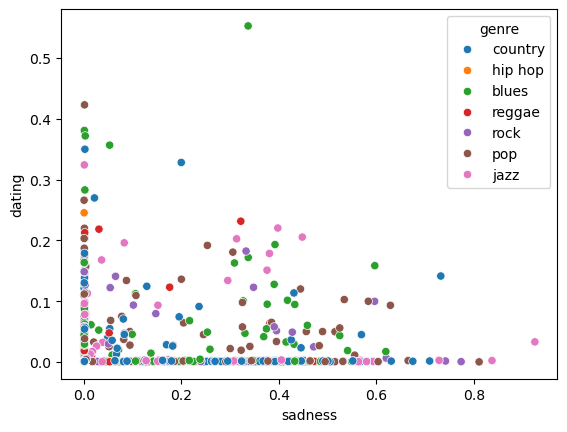

In [390]:
import seaborn as sns

sns.scatterplot(songs, x="sadness", y="dating", hue="genre")

Let's apply the same Kmeans steps to our dataset of actual music to check if we can find clusters.

In [391]:
songs.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [392]:
# Select numeric features assumed to represent music track attributes
predictor_cols = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'sadness', 'feelings']
X = songs[predictor_cols]
# Look! No Y!

# Apply K-Means clustering with k=3 on the selected features
kmeans_music = KMeans(n_clusters=3, random_state=42)
kmeans_music.fit(X)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Let's see the clusters we generate for a sample of 10 unlabeled songs.

In [393]:
sample_songs = songs.sample(10)

selected_predictors = sample_songs[predictor_cols]
sample_labels = kmeans_music.predict(selected_predictors)

In [394]:
sample_songs["predicted_class"] = sample_labels

sample_songs[["artist_name", "track_name", "predicted_class"]]

,artist_name,track_name,predicted_class
578,jane's addiction,pigs in zen,2
91,drake,legend,2
564,pet shop boys,rent,0
827,"crosby, stills, nash & young",southern man,2
708,dennis brown,whip them jah (live),2
774,david gates,never let her go,1
447,lou donaldson,everything i do gonna be funky (from now on),1
298,death cab for cutie,crooked teeth,1
443,supersuckers,marie,0
977,sarah vaughan,i've got a crush on you,0


What do you think about these labels? Did it seem like they cluster songs well?

If not, let's try out different cluster labels instead.

In [395]:
# Evaluate clustering quality using the elbow method on the music dataset
inertias_music = []
ks_music = range(1, 10)

for k in ks_music:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias_music.append(km.inertia_)
    print('K:', k, 'Inertia:', km.inertia_)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

K: 1 Inertia: 208.55210593021093
K: 2 Inertia: 180.9624172730293
K: 3 Inertia: 151.49682061719457
K: 4 Inertia: 119.67558025824923
K: 5 Inertia: 107.65379615160955
K: 6 Inertia: 91.28149660646164
K: 7 Inertia: 88.50633829954161
K: 8 Inertia: 81.82172687055888
K: 9 Inertia: 78.91012051598841


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


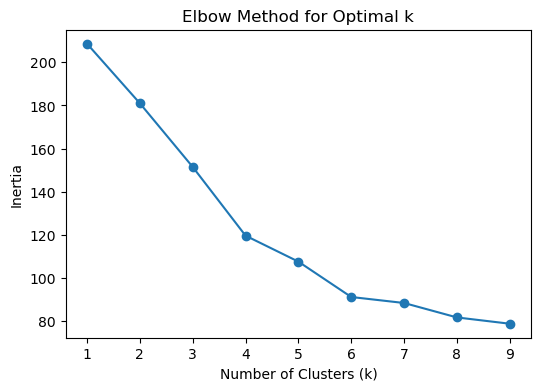

In [396]:
plt.figure(figsize=(6, 4))
plt.plot(list(ks_music), inertias_music, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

K: 2 Silhouette: 0.1323374685590075
K: 3 Silhouette: 0.19759459454415318
K: 4 Silhouette: 0.2695948084268015
K: 5 Silhouette: 0.29022960152941424
K: 6 Silhouette: 0.3246731813054298
K: 7 Silhouette: 0.27858417802439894


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K: 8 Silhouette: 0.2777828545213542
K: 9 Silhouette: 0.24583513558682643


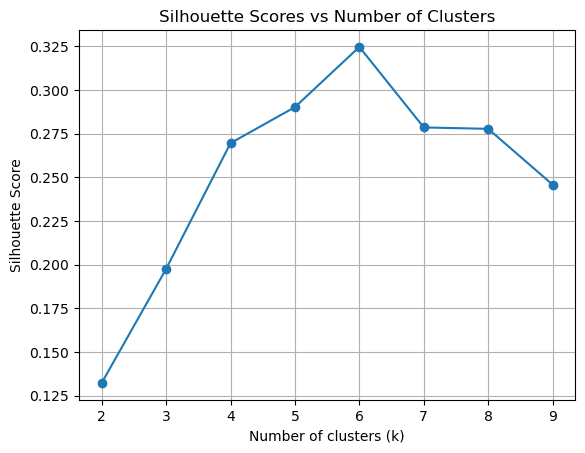

In [397]:
silhouette_scores = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    print('K:', k, 'Silhouette:', score)

plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## Practical Considerations and Extended Concepts

In our final section, we discuss the importance of feature scaling and other practical considerations that impact clustering outcomes.

In [398]:
from sklearn.preprocessing import StandardScaler

# Standardize the numeric features so that each has mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('First five rows of scaled features:')
print(X_scaled[:5])

First five rows of scaled features:
[[-3.98891207e-01 -6.55140583e-01 -6.91821568e-01 -5.14556245e-01
  -4.16931496e-01 -1.86641580e-01 -2.40001838e-01 -6.90663153e-01
  -5.37030836e-01 -5.85694062e-02  4.22823480e+00 -1.02094294e-01
  -3.00408755e-01  1.57248003e+00 -4.31780515e-01]
 [-1.51800270e-01 -2.61257812e-01 -6.90706806e-01  4.32858642e-01
   5.70147336e-01 -4.08840665e-01 -4.76069771e-01  6.24594001e-01
   2.49226577e+00 -4.52848534e-01 -5.26835322e-01 -5.50939681e-01
  -4.69231946e-01 -7.04574220e-01 -3.75994069e-05]
 [-3.93606223e-01 -6.53531394e-01 -6.90129464e-01  4.89957791e-02
  -7.07959315e-02  7.25924936e-01 -4.75057118e-01 -6.88039964e-01
   1.14759276e+00  1.13213255e-01  3.86338267e+00 -1.56782466e-01
  -4.67518803e-01 -7.04018519e-01 -4.28143757e-01]
 [-3.61600847e-01  1.75069299e+00 -6.79882244e-01  3.34626295e+00
  -3.69297003e-01 -3.63035344e-01 -4.57083557e-01 -6.72154174e-01
  -5.25608745e-01 -4.36039286e-01 -5.07165118e-01 -5.28662998e-01
  -4.37112280e-01 -

In [399]:
kmeans_music = KMeans(n_clusters=3, random_state=42)
kmeans_music.fit(X_scaled)

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [400]:
scaled_labels = kmeans_music.predict(selected_predictors)

sample_songs["scaled_labels"] = scaled_labels

sample_songs[["artist_name", "track_name", "scaled_labels"]]

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,artist_name,track_name,scaled_labels
578,jane's addiction,pigs in zen,1
91,drake,legend,1
564,pet shop boys,rent,0
827,"crosby, stills, nash & young",southern man,1
708,dennis brown,whip them jah (live),0
774,david gates,never let her go,0
447,lou donaldson,everything i do gonna be funky (from now on),0
298,death cab for cutie,crooked teeth,0
443,supersuckers,marie,0
977,sarah vaughan,i've got a crush on you,0


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

K: 1 Inertia: 14999.999999999998
K: 2 Inertia: 13951.003601491075
K: 3 Inertia: 13074.511561483107
K: 4 Inertia: 12277.50698227371
K: 5 Inertia: 11175.596898389187
K: 6 Inertia: 10659.823246748356
K: 7 Inertia: 9962.52623889924
K: 8 Inertia: 8918.251018843503
K: 9 Inertia: 8443.752267762495


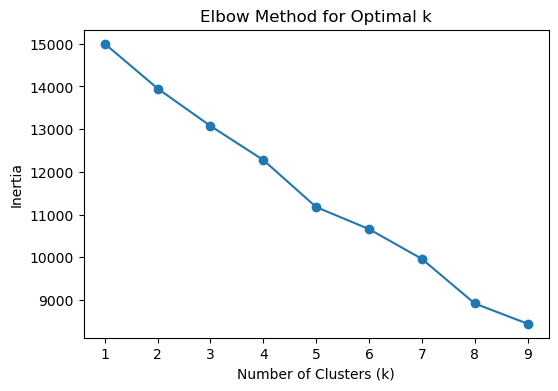

In [401]:
# Evaluate clustering quality using the elbow method on the music dataset
inertias_music = []
ks_music = range(1, 10)

for k in ks_music:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    inertias_music.append(km.inertia_)
    print('K:', k, 'Inertia:', km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(ks_music), inertias_music, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is k

K: 2 Silhouette: 0.08875836278576683
K: 3 Silhouette: 0.10028950715995032
K: 4 Silhouette: 0.11108592231011316
K: 5 Silhouette: 0.14965654836664757
K: 6 Silhouette: 0.16034455042883208


c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


K: 7 Silhouette: 0.1712829361640031
K: 8 Silhouette: 0.20401198301465967
K: 9 Silhouette: 0.20928340997927528


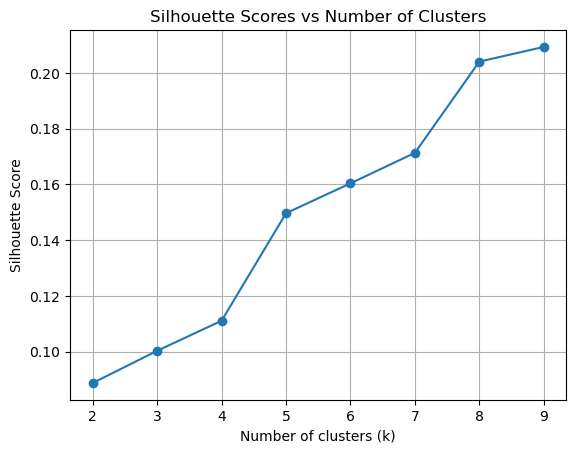

In [402]:
silhouette_scores = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)

    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    print('K:', k, 'Silhouette:', score)

plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

This code applies standard scaling to the numeric features, ensuring that all features contribute equally to distance measurements in K-Means. Scaling is a crucial step in preparing real-world data for clustering.

## Lab Conclusion

Throughout this lab, you built a K-Means clustering model from its basic components, starting from distance calculations and centroid updates through to applying the method on a real-world dataset. Review these code-blocks for your upcoming TLAB #3.